# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.


# **1. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**

   

In [2]:
# Load data

url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


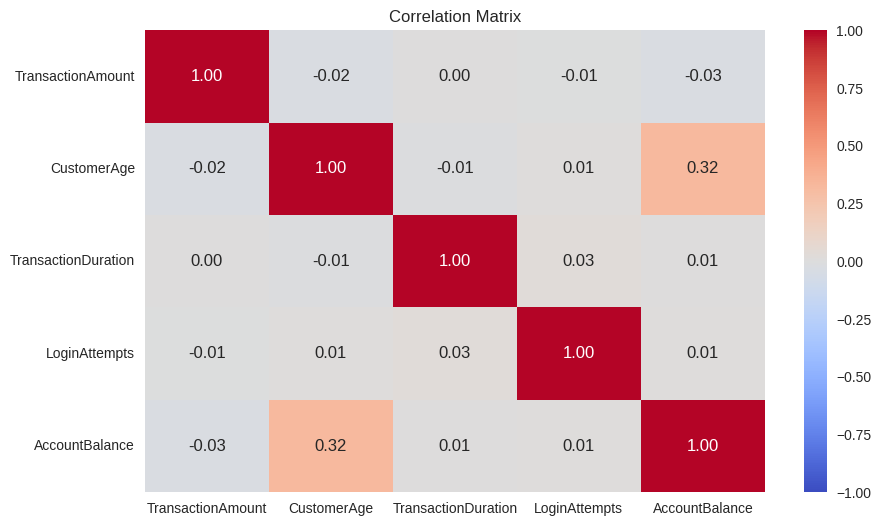

In [6]:
# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

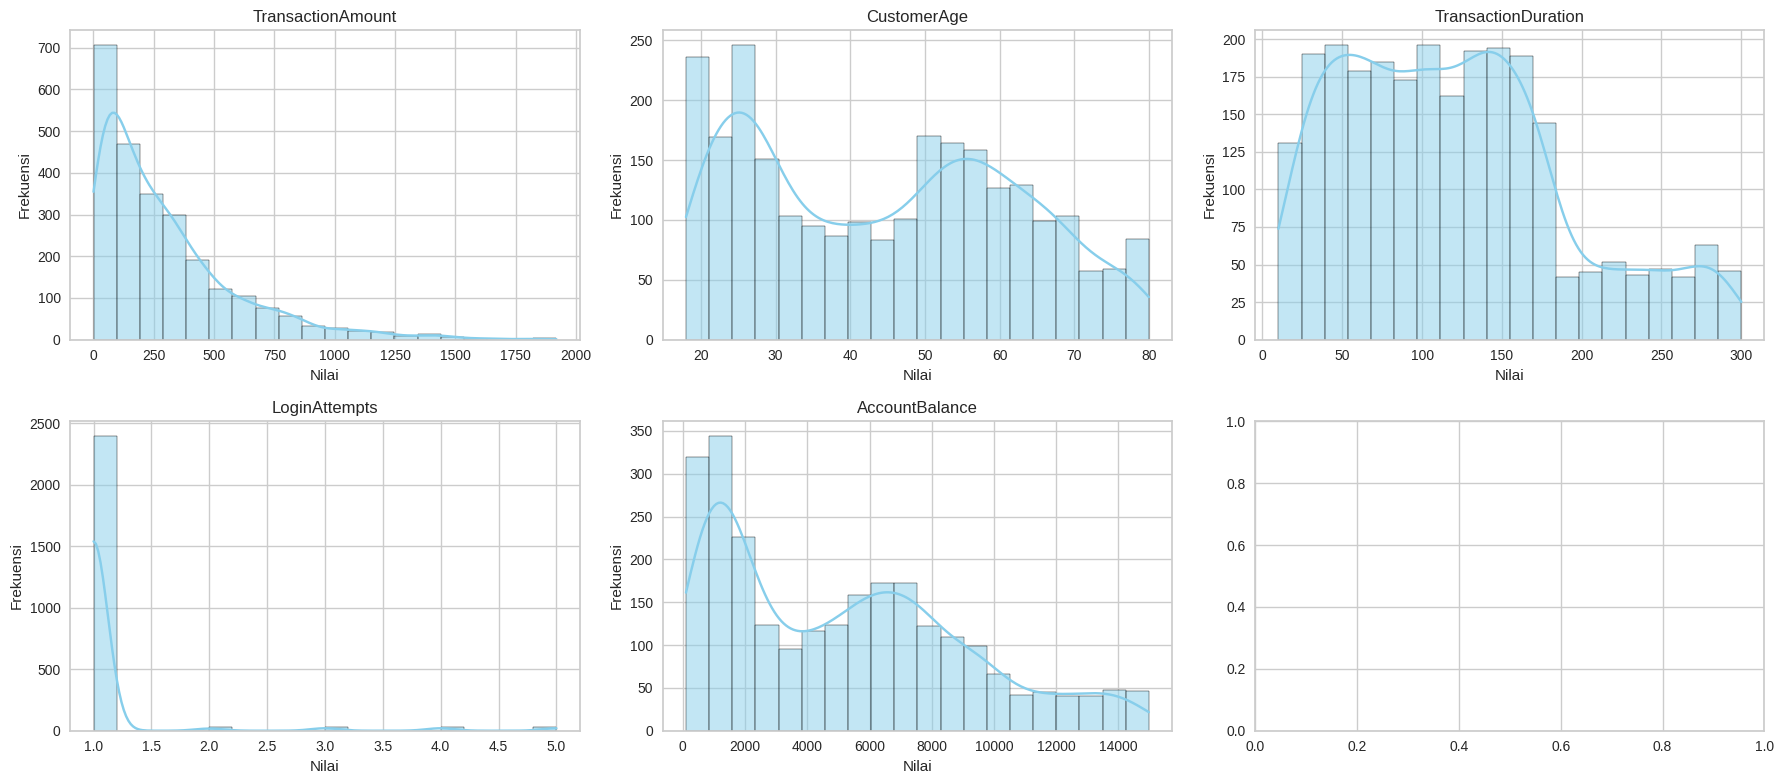

In [7]:
# Menampilkan histogram untuk semua kolom numerik

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    # Tampilkan histogram dan pastikan plot ditempatkan di subplot (axes) yang benar
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])

    # Atur judul dan label
    axes[i].set_title(column)
    axes[i].set_xlabel("Nilai")
    axes[i].set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()

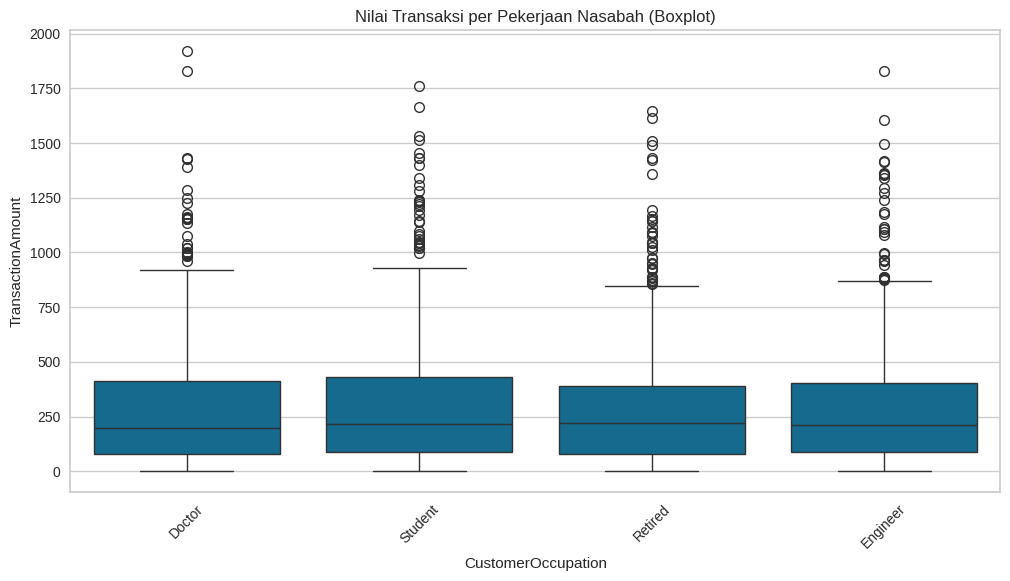

/tmp/ipython-input-3583166039.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df, palette='Set3', inner='quartile')
/tmp/ipython-input-3583166039.py:19: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


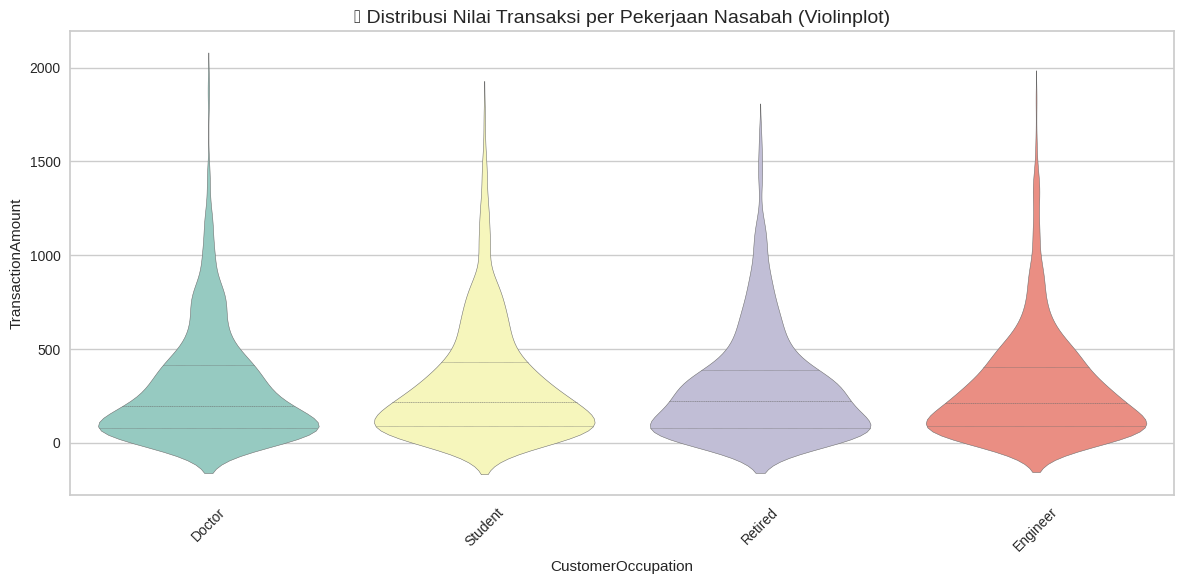

In [8]:
plt.figure(figsize=(12, 6))

# Buat visualisasi boxplot untuk melihat sebaran 'TransactionAmount' (y) berdasarkan 'CustomerOccupation' (x)
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (Boxplot)")

# Putar label sumbu-x agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df, palette='Set3', inner='quartile')

plt.title("💼 Distribusi Nilai Transaksi per Pekerjaan Nasabah (Violinplot)", fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan drop pada data null/nan dan data yang duplicate
3. Melakukan drop pada seluruh kolom id, address, dan date.
4. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.


In [9]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
df.duplicated().sum()

np.int64(21)

In [11]:
# Panggil fungsi untuk menghapus baris yang hilang dan pastikan agar perubahan disimpan kembali ke 'df'
df.dropna(inplace=True)

# Cek kembali dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [12]:
# Panggil fungsi untuk menghapus baris duplikat dan pastikan agar perubahan disimpan kembali ke 'df'
df.drop_duplicates(inplace=True)

# Cek kembali dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

In [13]:
cols_to_drop = [col for col in df.columns if
                "id" in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

# Gunakan fungsi .drop() untuk menghapus kolom-kolom yang ada di 'cols_to_drop'.
df = df.drop(columns=cols_to_drop)

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68


## **Output yang diharapkan:**

In [14]:
# Pilih semua kolom yang bertipe 'object' (kategorikal)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

encoders = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_cols:
    # Buat (instantiate) objek LabelEncoder
    label_encoder = LabelEncoder()

    # Terapkan (fit) encoder ke data dan sekaligus ubah (transform) data tersebut
    df[column] = label_encoder.fit_transform(df[column])

    # Simpan encoder
    encoders[column] = label_encoder

# Tampilkan 5 baris pertama untuk memverifikasi hasil encoding
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68


In [15]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

In [16]:
# Melakukan Handling Outlier Data menggunakan metode drop.

for col in numerical_cols:

    # Hitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Hitung Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Tentukan batas bawah (lower bound) dan batas atas (upper bound)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame: Simpan hanya baris di mana nilai 'df[col]' berada DI ANTARA (inklusif) batas bawah dan batas atas.
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.0,1945.000000
mean,256.838278,0.771722,21.299743,0.977378,44.693059,1.503342,119.225193,1.0,5100.811913
std,218.370197,0.419830,12.329250,0.804119,17.743453,1.135888,70.600647,0.0,3907.153333
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,102.200000
25%,78.920000,1.000000,11.000000,0.000000,27.000000,0.000000,63.000000,1.0,1488.650000
50%,199.700000,1.000000,21.000000,1.000000,45.000000,1.000000,111.000000,1.0,4693.600000
75%,374.500000,1.000000,32.000000,2.000000,59.000000,3.000000,162.000000,1.0,7659.990000
max,903.190000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,1.0,14977.990000


In [17]:
# Buat (instantiate) StandardScaler
scaler = StandardScaler()

# Terapkan (fit) scaler ke data dan sekaligus ubah (transform) data tersebut
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasil scaling
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# Tentukan kolom numerik yang ingin Anda kelompokkan
col_to_bin = 'CustomerAge'  # (Isi dengan 'CustomerAge' atau kolom numerik lain)

# Tentukan nama untuk kolom kategori baru
new_col_name = 'CustomerAge_bin'

# Tentukan label untuk 3 grup (Anda dapat menentukan nama label-nya sendiri)
# Mulai dari rendah --> sedang --> tinggi
bin_labels = ['low', 'medium', 'hign']

df_temp_unscaled_age = pd.DataFrame(scaler.inverse_transform(df[numerical_cols]),
                                    columns=numerical_cols,
                                    index=df.index)

df[new_col_name] = pd.qcut(df_temp_unscaled_age[col_to_bin], q=3, labels=bin_labels, duplicates='drop')

# Lakukan Label Encoding pada kolom baru ini agar menjadi numerik
label_encoder_bin = LabelEncoder()
df[new_col_name] = label_encoder_bin.fit_transform(df[new_col_name])

# Store this specific encoder for the binned column
encoders[new_col_name] = label_encoder_bin

# Add the new column name to 'categorical_cols' if not already there
if new_col_name not in categorical_cols:
    categorical_cols.extend([new_col_name])

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,0
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,0
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,1
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,1
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,1


# **4. Membangun Model Clustering**
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Buat salinan (copy) dari 'df' ke variabel 'df_used'
df_used = df.copy()

# Tampilkan ringkasan statistik dari DataFrame 'df'
df_used.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000,1.945000e+03,1945.0,1.945000e+03,1945.000000
mean,-8.402305e-17,0.771722,21.299743,0.977378,-1.269479e-16,1.503342,2.557223e-17,0.0,-6.027740e-17,1.001028
std,1.000257e+00,0.419830,12.329250,0.804119,1.000257e+00,1.135888,1.000257e+00,0.0,1.000257e+00,0.810171
min,-1.175271e+00,0.000000,0.000000,0.000000,-1.504776e+00,0.000000,-1.547483e+00,0.0,-1.279678e+00,0.000000
25%,-8.149648e-01,1.000000,11.000000,0.000000,-9.974163e-01,0.000000,-7.965883e-01,0.0,-9.247374e-01,0.000000
50%,-2.617251e-01,1.000000,21.000000,1.000000,1.730327e-02,1.000000,-1.165330e-01,0.0,-1.042490e-01,1.000000
75%,5.389562e-01,1.000000,32.000000,2.000000,8.065296e-01,3.000000,6.060257e-01,0.0,6.551666e-01,2.000000
max,2.960651e+00,1.000000,42.000000,2.000000,1.990369e+00,3.000000,2.561185e+00,0.0,2.528623e+00,2.000000


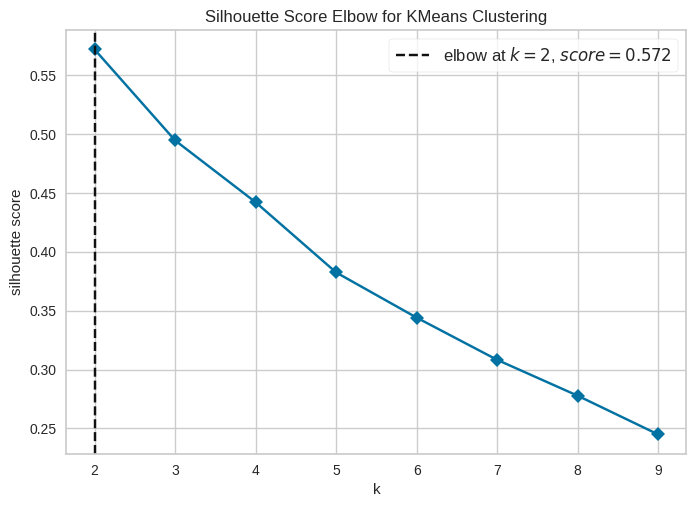

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Buat (instantiate) model clustering
model = KMeans()
visualizer = KElbowVisualizer(model,
                       k=(2,10),
                       metric='silhouette',
                       timings=False)

# Jalankan (fit) visualizer pada data
visualizer.fit(df)

# Tampilkan plot
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering

# Buat (instantiate) objek model KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model dengan data Anda (df)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Simpan model clustering yang sudah dilatih
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.

# Dapatkan hasil (label) cluster dari model 'kmeans' yang telah di-fit
labels = kmeans.labels_

# Panggil fungsi untuk menghitung silhouette score
score = silhouette_score(df, labels)

print("Silhouette Score:", score)

Silhouette Score: 0.5719840690144938


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


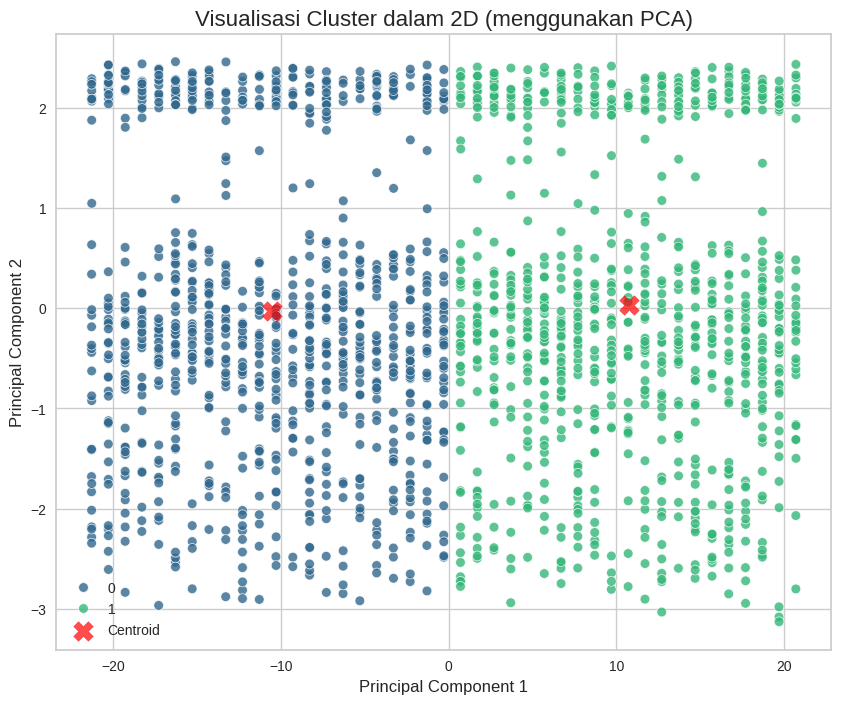

In [24]:
# Membuat visualisasi hasil clustering

# Buat (instantiate) objek PCA untuk 2 komponen (n_components=2)
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df' dan transformasikan data tersebut
df_pca = pca.fit_transform(df)

# Buat DataFrame baru 'df_pca' dari hasil transformasi
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Tambahkan kolom 'Cluster' ke 'df_pca' menggunakan 'labels'(variabel dari hasil 'kmeans.labels_' sebelumnya)
df_pca['Cluster'] = labels

# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',  # Warnai titik berdasarkan kolom 'Cluster'
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)

plt.title('Visualisasi Cluster dalam 2D (menggunakan PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


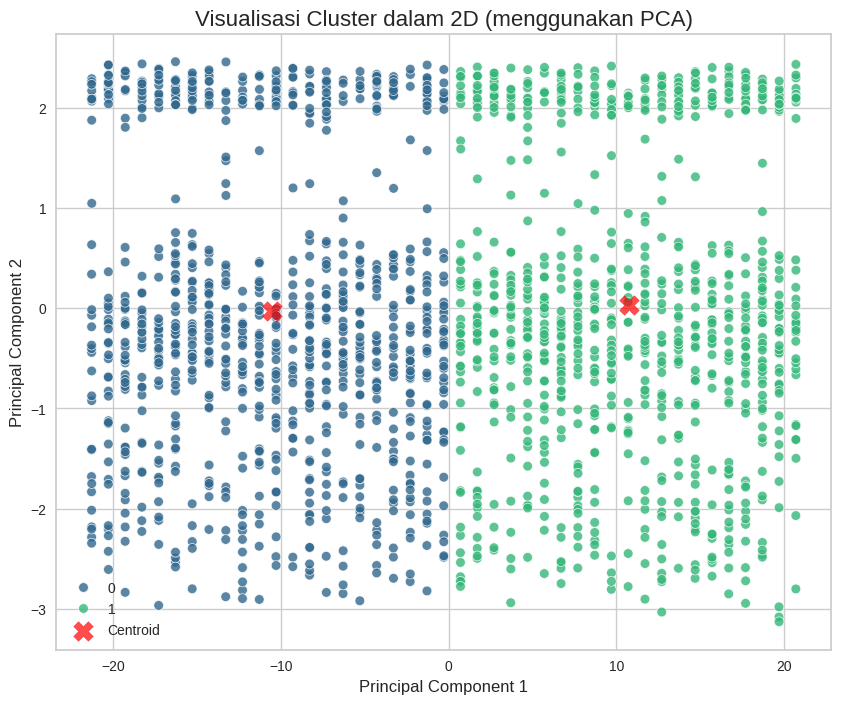

In [25]:
pca = PCA(n_components=2)
df_pca_array = pca.fit_transform(df)
df_pca = pd.DataFrame(data=df_pca_array, columns=['Principal Component 1', 'Principal Component 2'])

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)
labels = kmeans.labels_

df_pca['Cluster'] = labels

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',  # Warnai titik berdasarkan kolom 'Cluster'
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)

plt.title('Visualisasi Cluster dalam 2D (menggunakan PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend()
plt.show()

In [26]:
# Buat (instantiate) objek PCA dengan 2 komponen
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df_used' dan transformasikan data tersebut
df_pca_array = pca.fit_transform(df_used)

# Buat DataFrame baru 'data_final' dari hasil array PCA
data_final = pd.DataFrame(data=df_pca_array, columns=['PCA1', 'PCA2'])

# Buat (instantiate) model KMeans BARU
kmeans_pca = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model KMeans BARU ini HANYA pada 'data_final'
kmeans_pca.fit_transform(data_final)

array([[25.32551276,  4.34258842],
       [ 5.11361157, 17.28435599],
       [12.48002083,  9.28561486],
       ...,
       [16.27279471,  5.0639317 ],
       [18.28128526,  3.07069723],
       [29.34662177,  8.20430477]])

In [27]:
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [28]:
# Tambahkan kolom 'Cluster' baru berupa 'labels' (variabel dari 'kmeans.labels_' sebelumnya)
df_used['Cluster'] = labels

# Kelompokkan (groupby) 'df_used' berdasarkan 'Cluster' dan hitung agregasi untuk 'numerical_cols'.
agg_summary = df_used.groupby("Cluster")[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Tampilkan hasil ringkasan
display(agg_summary)

Cluster                      0     1
TransactionAmount   mean -0.01  0.01
                    min  -1.17 -1.18
                    max   2.96  2.90
CustomerAge         mean  0.02 -0.02
                    min  -1.50 -1.50
                    max   1.99  1.99
TransactionDuration mean  0.03 -0.03
                    min  -1.55 -1.55
                    max   2.56  2.55
LoginAttempts       mean  0.00  0.00
                    min   0.00  0.00
                    max   0.00  0.00
AccountBalance      mean  0.01 -0.01
                    min  -1.28 -1.28
                    max   2.52  2.53

# Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **CLUSTER 0: Nasabah dengan Aktivitas Transaksi dan Saldo Lebih Tinggi**:
  - Rata-rata (mean) Transaction Amount: -0.01
  - Rata-rata (mean) Customer Age: 0.02
  - Rata-rata (mean) Transaction Duration: 0.03
  - Rata-rata (mean) Account Balance: 0.01
  - **Analisis:** Nilai rata-rata setiap fitur berada sedikit di atas 0, menandakan bahwa cluster ini memiliki karakteristik lebih tinggi dari rata-rata populasi (karena data sudah di-standardize). Nasabah dalam kelompok ini memiliki saldo akun dan nominal transaksi sedikit lebih besar dari rata-rata, dengan durasi transaksi yang lebih lama, mencerminkan perilaku pengguna yang aktif dan bertransaksi dalam jumlah besar.

1. **CLUSTER 1: Nasabah dengan Aktivitas Transaksi dan Saldo Lebih Rendah**:
  - Rata-rata (mean) Transaction Amount: 0.01
  -  Rata-rata (mean) Customer Age: -0.02
  -  Rata-rata (mean) Transaction Duration: -0.03
  -  Rata-rata (mean) Account Balance: -0.01
  - **Analisis:** Nilai rata-rata yang sedikit di bawah nol menunjukkan bahwa kelompok ini memiliki aktivitas dan saldo lebih rendah dari rata-rata keseluruhan. Nasabah dalam cluster ini melakukan transaksi dengan nilai nominal dan durasi yang lebih kecil. Mereka mungkin merupakan kelompok nasabah baru atau pengguna akun sekunder yang belum sepenuhnya aktif dalam bertransaksi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
df_used.rename(columns={"Cluster": "Target"},inplace=True)

# Tampilkan 5 baris pertama untuk memverifikasi
df_used.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,Target
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,0,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,0,0
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,1,1
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,1,1
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,1,1


In [30]:
df_used.to_csv('data_clustering.csv', index=False)

In [31]:
df_inverse = df_used.copy()

# Gunakan 'scaler' untuk mengembalikan 'numerical_cols' ke nilai aslinya.
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,0,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,0,0
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,1,1
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,1,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,1,1


In [32]:
categorical_cols

['TransactionType',
 'Location',
 'Channel',
 'CustomerOccupation',
 'CustomerAge_bin']

In [33]:
# inverse dataset yang sudah diencode ke kategori aslinya.

for column in categorical_cols:
    # Ambil encoder yang tepat untuk 'column' dari dictionary 'encoders'
    encoder = encoders[column]

    # Gunakan scaler untuk mengembalikan (inverse) kolom tersebut
    df_inverse[column] = encoder.inverse_transform(df_inverse[column].astype(int))

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,hign,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,hign,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,low,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,low,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,low,1


In [34]:
# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'numerical_cols'.
agg_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'categorical_cols'.
agg_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0]).round(2).T

# Tampilkan kedua hasil ringkasan
display(agg_summary_num)
display(agg_summary_cat)

Target                           0         1
TransactionAmount   mean    255.55    258.15
                    min       0.32      0.26
                    max     903.19    889.01
CustomerAge         mean     45.06     44.33
                    min      18.00     18.00
                    max      80.00     80.00
TransactionDuration mean    121.12    117.30
                    min      10.00     10.00
                    max     300.00    299.00
LoginAttempts       mean      1.00      1.00
                    min       1.00      1.00
                    max       1.00      1.00
AccountBalance      mean   5142.17   5058.81
                    min     117.98    102.20
                    max   14942.78  14977.99

Target,0,1
TransactionType,Debit,Debit
Location,Charlotte,Tucson
Channel,Branch,Branch
CustomerOccupation,Doctor,Student
CustomerAge_bin,medium,low


# Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: Nasabah dengan Aktivitas Transaksi dan Saldo Lebih Tinggi**:
  - **Rata-rata (mean) <Fitur>:** 255.55
  - **Analisis:** Cluster ini mencakup nasabah dengan saldo rekening dan nominal transaksi yang cukup tinggi, serta durasi transaksi yang relatif lebih lama. Hal ini menunjukkan kelompok nasabah yang stabil secara finansial dan aktif bertransaksi dalam jumlah besar.
2. **Cluster 1: Nasabah dengan Aktivitas Transaksi dan Saldo Sedikit Lebih Rendah**:
  - **Rata-rata (mean) <Fitur>:** 258.15
  - **Analisis:** Cluster ini memiliki nasabah dengan saldo dan nominal transaksi sedikit lebih rendah dibandingkan cluster 0, serta durasi transaksi yang sedikit lebih singkat. Mereka mungkin merupakan kelompok nasabah menengah aktif yang masih berpotensi untuk ditingkatkan loyalitasnya melalui penawaran kredit ringan, promosi tabungan berjangka, atau program cashback transaksi.

In [35]:
df_inverse.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,hign,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,hign,0
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,low,1
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,low,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,low,1


In [36]:
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.